In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


from matplotlib import pyplot as plt
import os
from zipfile import ZipFile

import warnings
warnings.filterwarnings('ignore')

# Bit coin analysis notebook

#### https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset
https://arxiv.org/abs/1906.07852

In [2]:
%%bash
wget -nc -O data.zip http://archive.ics.uci.edu/ml/machine-learning-databases/00526/data.zip
## Download the data

--2020-06-30 12:35:48--  http://archive.ics.uci.edu/ml/machine-learning-databases/00526/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116104947 (111M) [application/x-httpd-php]
Saving to: ‘data.zip’

     0K .......... .......... .......... .......... ..........  0%  299K 6m19s
    50K .......... .......... .......... .......... ..........  0%  588K 4m46s
   100K .......... .......... .......... .......... ..........  0% 10.6M 3m14s
   150K .......... .......... .......... .......... ..........  0% 13.9M 2m27s
   200K .......... .......... .......... .......... ..........  0%  594K 2m36s
   250K .......... .......... .......... .......... ..........  0% 27.0M 2m11s
   300K .......... .......... .......... .......... ..........  0% 17.1M 1m53s
   350K .......... .......... .......... .......... ..........  0% 8.9

Unzip the Data

In [6]:
os.getcwd()
with ZipFile('data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()



In [22]:
data = pd.read_csv("BitcoinHeistData.csv") 

In [23]:
data.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [37]:
data.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [14]:
data.size

29166970

In [24]:
data['weight'].mean()
data['weight'].std()

3.674255255589117

In [61]:
grouplabels=data.groupby(by='label')
grouplabels.size().nlargest(9)


label
white                   2875284
paduaCryptoWall           12390
montrealCryptoLocker       9315
princetonCerber            9223
princetonLocky             6625
montrealCryptXXX           2419
montrealNoobCrypt           483
montrealDMALockerv3         354
montrealDMALocker           251
dtype: int64

In [26]:
grouplabelsaddress=data.groupby(by=['label','address']).agg({'address': 'count'})
#df_plus1yr.groupby(['BOROUGH']).agg({'BOROUGH':'count'}).rename(columns={'BOROUGH':'BOROUGH','BOROUGH':'Counts'}).sort_values(by=['Counts'])
grouplabelsaddress

address
label                 address                                    
montrealAPT           35iCvpMMnUWcSWrYtLJLXqe9xo5CYEWRhw        7
                      377CY1m8W2qbQQX5HHjziimdh2faGjDeLv        4
montrealComradeCircle 1HssDyDTZj1hVdwhdpF49wLKLPQoCRJB9T        1
montrealCryptConsole  1GfxDzSzyBzRNiP5zXqaa32qybify4G7ro        1
                      1KG8rWYWRYHfvjVe8ddEyJNCg6HxVWYSQm        3
...                                                           ...
white                 3R2bx1effiXUFrkyFtEi12ffjQqtb3V6J6        1
                      3R2c2tJWaZXtpGH7cCvzuzaZJuzfriLBxQ        1
                      3R2cSr9dyGuRR15vyPRU2eNG7qG82JSPYo        1
                      3R2cYexUEbLnfQQbq33DavqGCcsnJdsmpH        1
                      unknown                                   4

[2631095 rows x 1 columns]

In [29]:
#data['length'].hist(bins=200)

In [30]:
#data['count'].hist(bins=10)

In [31]:
#data['length'].hist(bins=4)

In [32]:
#data['neighbors'].hist(bins=4)

In [33]:
#data['label'].nunique

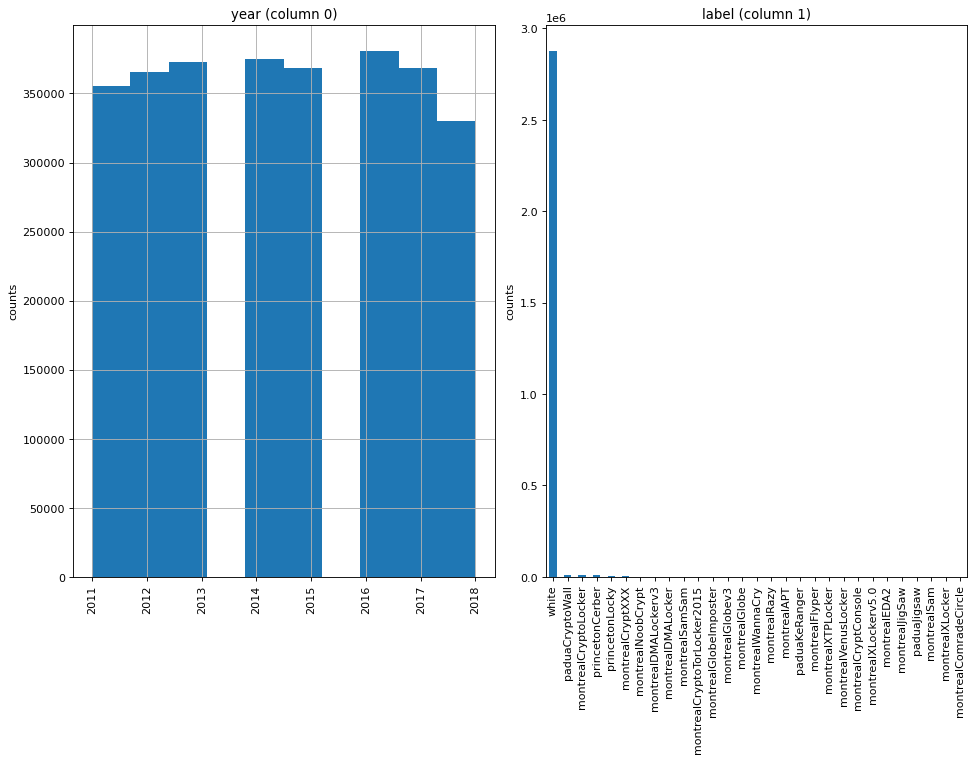

In [195]:
from EDA_plot import plotPerColumnDistribution,plotScatterMatrix
plotPerColumnDistribution(data, 10, 5)

In [ ]:
from EDA_plot import plotCorrelationMatrix
plotCorrelationMatrix(data, 8)

In [ ]:
plotScatterMatrix(data, 20, 10)

In [52]:
data.isna().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [57]:
#time_data=pd.concat([data['year'],data['day'], data['label']],axis=1,sort='True')

In [38]:
#time_data.head(20)

In [39]:
# time_data['date']=pd.to_datetime(time_data['year'] * 1000 + time_data['day'], format='%Y%j')
# time_data.head(20)

In [51]:
data['date']=pd.to_datetime(data['year'] * 1000 + data['day'], format='%Y%j')
data

,address,year,day,length,weight,count,looped,neighbors,income,label,date
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber,2017-01-11
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky,2016-05-11
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber,2016-09-02
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber,2016-11-17
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky,2016-08-25
...,...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white,2018-11-26
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white,2018-11-26
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white,2018-11-26
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white,2018-11-26


###### Identify the n largest bitcoin addresses and identify the distribution of their labels

In [41]:
addr_groups=data.groupby(by='address')
addr_list=addr_groups.size().nlargest(20)

In [42]:
print(addr_list)

address
1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU    420
16cVG72goMe4sNqZhnpmnqfCMZ1uSFbUit    261
12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza    207
12YursV58dRT2c9iuZg3jEWfwgTDamBcnd    183
1LEq4WmpCrqBd7V3PywE2nvFUFC3QTe52x    176
1CVWpTNwNYGdKgZRohiiVFrnFNbw8anG9     171
1PTizVYLYCJKZmoSVDjua3KdSR62Jfztih    159
1LPgKoErPUeM92SDY5axJzYCdQbeiRHD6i    147
12Vs7fvmcCnVoQWzNFfTWcU4H7oaK6Y5G6    143
17AGazRCLStNguMDCxDoj7ZQHvaZBWTJZj    126
1Prz2AM21sHNnNbeUnABTzaEqK7mTpg1ax    125
1MsCsEPC43GC3j2GA96nV36NysKX747tE     119
1AionCF4SHwJWp4NoFWdshuZAFXCkNJuon    118
16i7w5G2aoq8zqLDR3VJnawZ8VmYFZjVsd    112
1EueRvvAoT2q8CSxehVKk7XjnbWcCgjwbp    106
1Km4QwBnppCULZeUSmaJMV3qVi7sQmCtKf    105
1AUJmVVJhC5KHSjdToTs4EQ2DM7fExB7Nv    104
1E66TvG7JhhRNTNBgU57qmCyzzBb3CMbyV    102
1PfpSmx1qg2tbREp1grWbSh8z1UojzT87p    101
1AohbDRZhMfEcgRjD6gs3m7B3NuLsdcJii     97
dtype: int64


In [147]:
#list(addr_groups['address'].unique())

In [43]:
lst=data['address'].value_counts().nlargest(n=20).index.tolist()


In [62]:
lstlabels=data['label'].value_counts().nlargest(n=9).index.tolist()
print(lstlabels)

['white', 'paduaCryptoWall', 'montrealCryptoLocker', 'princetonCerber', 'princetonLocky', 'montrealCryptXXX', 'montrealNoobCrypt', 'montrealDMALockerv3', 'montrealDMALocker']


In [50]:
#print(lst)

In [28]:
#df.groupby(['address']).agg({'AgencyName':'count','ContractAmount':'mean'}).rename(columns={'AgencyName':'Counts','ContractAmount':'MeanContractAmount'}).nlargest(5,'Counts')
print(lst)

['1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU', '16cVG72goMe4sNqZhnpmnqfCMZ1uSFbUit', '12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza', '12YursV58dRT2c9iuZg3jEWfwgTDamBcnd', '1LEq4WmpCrqBd7V3PywE2nvFUFC3QTe52x', '1CVWpTNwNYGdKgZRohiiVFrnFNbw8anG9', '1PTizVYLYCJKZmoSVDjua3KdSR62Jfztih', '1LPgKoErPUeM92SDY5axJzYCdQbeiRHD6i', '12Vs7fvmcCnVoQWzNFfTWcU4H7oaK6Y5G6', '17AGazRCLStNguMDCxDoj7ZQHvaZBWTJZj', '1Prz2AM21sHNnNbeUnABTzaEqK7mTpg1ax', '1MsCsEPC43GC3j2GA96nV36NysKX747tE', '1AionCF4SHwJWp4NoFWdshuZAFXCkNJuon', '16i7w5G2aoq8zqLDR3VJnawZ8VmYFZjVsd', '1EueRvvAoT2q8CSxehVKk7XjnbWcCgjwbp', '1Km4QwBnppCULZeUSmaJMV3qVi7sQmCtKf', '1AUJmVVJhC5KHSjdToTs4EQ2DM7fExB7Nv', '1E66TvG7JhhRNTNBgU57qmCyzzBb3CMbyV', '1PfpSmx1qg2tbREp1grWbSh8z1UojzT87p', '1AohbDRZhMfEcgRjD6gs3m7B3NuLsdcJii']


In [5]:
#data[(data['address']=='1AionCF4SHwJWp4NoFWdshuZAFXCkNJuon') & (data['label']!='white')]

,address,year,day,length,weight,count,looped,neighbors,income,label


In [46]:
#data[data['address']=='1AionCF4SHwJWp4NoFWdshuZAFXCkNJuon']

In [45]:
# df1=data[data['address']=='1AionCF4SHwJWp4NoFWdshuZAFXCkNJuon'].sort_values(by=['date'])
# df2=data[data['address']=='16cVG72goMe4sNqZhnpmnqfCMZ1uSFbUit'].sort_values(by=['date'])

# df3=data[data['address']=='12YursV58dRT2c9iuZg3jEWfwgTDamBcnd'].sort_values(by=['date'])


In [144]:
df1.shape
df1.size

1298

In [47]:
# print(df1.nunique())
# #print(df1.size)
# #df1.groupby(by='date')
# pd.set_option('display.max_rows', 1500)
# df1[df1['date']=='2011-08-04']

In [152]:
#print(df2.nunique())
#df=data[data['address']==addr].sort_values(by=['date'])
#lstlabels=data['label'].value_counts().nlargest(n=9).index.tolist()
grouplabels=data.groupby(by=['label','date'],as_index=False).agg({'length': 'mean','count': 'mean','income': 'mean','weight':'mean', 'looped':'mean' }).sort_values(by='date')
#grouplabels.reset_index()
#pd.concat([data['label'],data['date'],grouplabels])

In [189]:
# print(df3.nunique())
#featlist=grouplabels.columns[2:]
featlist=grouplabels.columns[2:]
print(featlist)

Index(['length', 'count', 'income', 'weight', 'looped'], dtype='object')


In [58]:
# import pandas as pd

from bokeh.palettes import Spectral11
from bokeh.plotting import figure, show
# from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT

p = figure(plot_width=1800, plot_height=750, x_axis_type="datetime")
p.title.text = 'Click on legend entries to mute the corresponding lines'

for addr, color in zip(lst,Spectral11):
    df=data[data['address']==addr].sort_values(by=['date'])
    p.line(df['date'], df['income'], line_width=2, color=color, alpha=0.8,
            muted_color=color, muted_alpha=0.2, legend_label=addr)

# for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
#     df = pd.DataFrame(data)
#     df['date'] = pd.to_datetime(df['date'])
#     p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8,
#            muted_color=color, muted_alpha=0.2, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

show(p)


# for addr in lst:
    

In [119]:
# import pandas as pd
# from bokeh.io import show
# from bokeh.models import CustomJS, Dropdown

# menu = [("Item 1", "length"), ("Item 2", "count"), ("Item 3", "Income"), ("Item 4", "weight")]

# dropdown = Dropdown(label="Dropdown button", button_type="warning", menu=menu)
# dropdown.js_on_event("menu_item_click", CustomJS(code="console.log('dropdown: ' + this.item, this.toString())"))

# show(dropdown)


from bokeh.palettes import Spectral9
from bokeh.plotting import figure, show
# from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT

p = figure(plot_width=1800, plot_height=750, x_axis_type="datetime")
p.title.text = 'Click on legend entries to mute the corresponding lines'

for label, color in zip(lstlabels[1:],Spectral9):
    df=grouplabels[grouplabels['label']==label].sort_values(by=['date'])
    p.line(df['date'], df['length'], line_width=2, color=color, alpha=0.8,
            muted_color=color, muted_alpha=0.2, legend_label=label)

# for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
#     df = pd.DataFrame(data)
#     df['date'] = pd.to_datetime(df['date'])
#     p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8,
#            muted_color=color, muted_alpha=0.2, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

show(p)


# for addr in lst:
    

In [194]:
from bokeh.io import show
from bokeh.models import CustomJS, Dropdown

menu = [("Length", "length"), ("counts", "count"), ("income", "income"), ("weight", "weight")]

dropdown = Dropdown(label="Dropdown button", button_type="warning", menu=menu)
dropdown.js_on_event("menu_item_click", CustomJS(code="console.log('dropdown: ' + this.item, this.toString())"))

show(dropdown)

groupaddr

,label,address,length,count,income,weight,looped
0,montrealAPT,35iCvpMMnUWcSWrYtLJLXqe9xo5CYEWRhw,84.571429,2518.714286,4.086032e+08,0.764325,1153.571429
1,montrealAPT,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,38.000000,1221.500000,3.079095e+08,0.608682,0.000000
2,montrealComradeCircle,1HssDyDTZj1hVdwhdpF49wLKLPQoCRJB9T,144.000000,1241.000000,2.033200e+08,0.051214,0.000000
3,montrealCryptConsole,1GfxDzSzyBzRNiP5zXqaa32qybify4G7ro,4.000000,1.000000,5.000000e+07,0.500000,0.000000
4,montrealCryptConsole,1KG8rWYWRYHfvjVe8ddEyJNCg6HxVWYSQm,51.333333,1064.333333,4.343333e+07,0.412308,0.000000
...,...,...,...,...,...,...,...
2631090,white,3R2bx1effiXUFrkyFtEi12ffjQqtb3V6J6,46.000000,1.000000,7.237191e+07,0.125000,0.000000
2631091,white,3R2c2tJWaZXtpGH7cCvzuzaZJuzfriLBxQ,2.000000,1.000000,2.457100e+08,0.250000,0.000000
2631092,white,3R2cSr9dyGuRR15vyPRU2eNG7qG82JSPYo,0.000000,1.000000,3.650000e+07,0.125000,0.000000
2631093,white,3R2cYexUEbLnfQQbq33DavqGCcsnJdsmpH,144.000000,4666.000000,2.251090e+09,0.030552,0.000000


In [193]:
groupaddr=data.groupby(by=['label','address'],as_index=False).agg({'length': 'mean','count': 'mean','income': 'mean','weight':'mean','looped':'mean' })


In [191]:
#groupaddr=data.groupby(by=['label','address'],as_index=False).agg({'length': 'sum','count': 'sum','income': 'sum','weight':'sum','looped':'sum' })
groupaddr_mean=groupaddr.groupby(by=['label'],as_index=False).agg({'length': 'mean','count': 'mean','income': 'mean','weight':'mean','looped':'mean' })
groupaddr_mean

,label,length,count,income,weight,looped
0,montrealAPT,372.000000,11258.500000,2.045930e+09,3.892502,4037.500000
1,montrealComradeCircle,144.000000,1241.000000,2.033200e+08,0.051214,0.000000
2,montrealCryptConsole,60.800000,1164.400000,6.364868e+07,0.830628,0.000000
3,montrealCryptXXX,84.768095,1414.683161,2.421400e+08,0.656569,109.019941
4,montrealCryptoLocker,189.351889,1903.302187,1.136334e+10,5.487013,623.355202
5,montrealCryptoTorLocker2015,35.375000,378.750000,1.170099e+09,2.051495,286.406250
6,montrealDMALocker,464.095238,10723.238095,1.063078e+10,11.575220,5145.285714
7,montrealDMALockerv3,93.356643,2383.622378,1.511530e+09,1.326838,234.062937
8,montrealEDA2,111.500000,6532.750000,5.677814e+07,0.256610,1427.250000
9,montrealFlyper,21.500000,364.750000,5.599953e+07,0.577451,0.000000


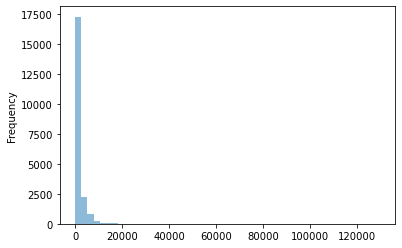

In [190]:
groupaddr[groupaddr['label']!='white']['count'].plot.hist(bins=50, alpha=0.5)


groupaddr=data.groupby(by=['label','address'],as_index=False).agg({'length': 'sum','count': 'sum','income': 'sum','weight':'sum','looped':'sum' })


In [184]:
np.max(groupaddr[groupaddr['label']!='white']['count'])

129608

In [149]:
dtest=data[data['label']!='white']

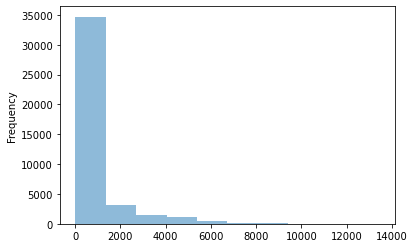

In [150]:
dtest['count'].plot.hist(bins=10, alpha=0.5)

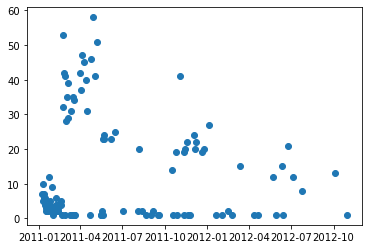

In [100]:
plt.scatter(df1['date'],df1['count'])

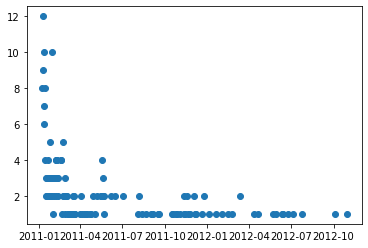

In [101]:
plt.scatter(df1['date'],df1['neighbors'])

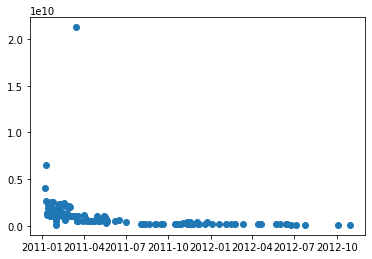

In [102]:
#plt.scatter(df1['date'],df1['income'])

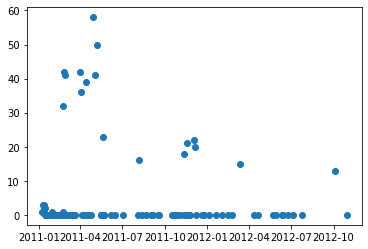

In [103]:
#plt.scatter(df1['date'],df1['looped'])

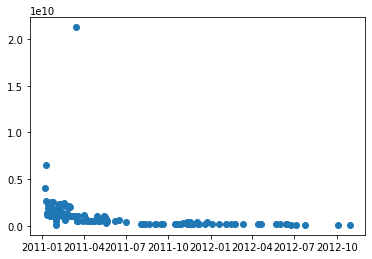

In [104]:
#plt.scatter(df1['date'],df1['income'])

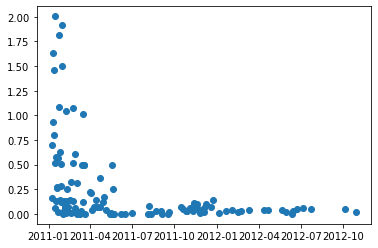

In [105]:
plt.scatter(df1['date'],df1['weight'])

In [181]:
df1.dtypes

address              object
year                  int64
day                   int64
length                int64
weight              float64
count                 int64
looped                int64
neighbors             int64
income              float64
label                object
date         datetime64[ns]
dtype: object

In [10]:
# import pandas as pd

# from bokeh.palettes import Spectral4
# from bokeh.plotting import figure, show
# from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT

# p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
# p.title.text = 'Click on legend entries to mute the corresponding lines'

# for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
#     df = pd.DataFrame(data)
#     df['date'] = pd.to_datetime(df['date'])
#     p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8,
#            muted_color=color, muted_alpha=0.2, legend_label=name)

# p.legend.location = "top_left"
# p.legend.click_policy="mute"

# show(p)